### Business Problem

- Analyze the data and generate insights that could help Netflix decide which type of shows/movies to produce and how to grow the business.

#### Problem Statements
```
What type of content is available in different countries?
How has the number of movies released per year changed over the last 20-30 years?
Comparison of tv shows vs. movies.
What is the best time to launch a TV show?
Analysis of actors/directors of different types of shows/movies.
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('netflix.csv')
df = data.copy()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [5]:
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
84 min         1
66 min         1
74 min         1
Name: rating, dtype: int64

### EDA

In [6]:
df['country'].value_counts()

United States                                  2818
India                                           972
United Kingdom                                  419
Japan                                           245
South Korea                                     199
                                               ... 
South Korea, Canada, United States, China         1
United Kingdom, Spain                             1
Mauritius                                         1
Saudi Arabia, Syria, Egypt, Lebanon, Kuwait       1
China, Japan                                      1
Name: country, Length: 748, dtype: int64

In [7]:
df['country'].nunique()

748

In [8]:
# splitting country
df1 = df['country'].apply(lambda x: str(x).split(', ')).tolist() 
df1

[['United States'],
 ['South Africa'],
 ['nan'],
 ['nan'],
 ['India'],
 ['nan'],
 ['nan'],
 ['United States',
  'Ghana',
  'Burkina Faso',
  'United Kingdom',
  'Germany',
  'Ethiopia'],
 ['United Kingdom'],
 ['United States'],
 ['nan'],
 ['nan'],
 ['Germany', 'Czech Republic'],
 ['nan'],
 ['nan'],
 ['United States'],
 ['nan'],
 ['Mexico'],
 ['nan'],
 ['nan'],
 ['nan'],
 ['Turkey'],
 ['nan'],
 ['nan'],
 ['India'],
 ['Australia'],
 ['nan'],
 ['United States'],
 ['United States'],
 ['United States', 'India', 'France'],
 ['nan'],
 ['nan'],
 ['United Kingdom'],
 ['nan'],
 ['nan'],
 ['nan'],
 ['nan'],
 ['Finland'],
 ['China', 'Canada', 'United States'],
 ['India'],
 ['United States'],
 ['United States'],
 ['United States'],
 ['United States'],
 ['United States'],
 ['nan'],
 ['South Africa', 'United States', 'Japan'],
 ['nan'],
 ['United States'],
 ['Nigeria'],
 ['India'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['United States'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['J

In [9]:
df1 = pd.DataFrame(df1,index=data['title']) 
df1

,0,1,2,3,4,5,6,7,8,9,10,11
title,,,,,,,,,,,,
Dick Johnson Is Dead,United States,None,None,None,None,None,None,None,None,None,None,None
Blood & Water,South Africa,None,None,None,None,None,None,None,None,None,None,None
Ganglands,nan,None,None,None,None,None,None,None,None,None,None,None
Jailbirds New Orleans,nan,None,None,None,None,None,None,None,None,None,None,None
Kota Factory,India,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
Zodiac,United States,None,None,None,None,None,None,None,None,None,None,None
Zombie Dumb,nan,None,None,None,None,None,None,None,None,None,None,None
Zombieland,United States,None,None,None,None,None,None,None,None,None,None,None


In [10]:
df1 = df1.stack()
df1

title                   
Dick Johnson Is Dead   0    United States
Blood & Water          0     South Africa
Ganglands              0              nan
Jailbirds New Orleans  0              nan
Kota Factory           0            India
                                ...      
Zodiac                 0    United States
Zombie Dumb            0              nan
Zombieland             0    United States
Zoom                   0    United States
Zubaan                 0            India
Length: 10845, dtype: object

In [11]:
df1 = pd.DataFrame(df1)
df1

,,0
title,,
Dick Johnson Is Dead,0,United States
Blood & Water,0,South Africa
Ganglands,0,nan
Jailbirds New Orleans,0,nan
Kota Factory,0,India
...,...,...
Zodiac,0,United States
Zombie Dumb,0,nan
Zombieland,0,United States


### Merging the country column with the new data

In [12]:
df2 = pd.merge(df1, df, how='inner', on = 'title')
df2.shape

(10845, 13)

In [13]:
df2.head(2)

,title,0,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Dick Johnson Is Dead,United States,s1,Movie,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,Blood & Water,South Africa,s2,TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [14]:
#df2[0].value_counts() ---> Name: 0, Length: 128, dtype: int64
#df2['country'].value_counts() ---> Name: country, Length: 748, dtype: int64

In [15]:
# dropping one of the country column(old one)
df2.drop(columns='country', inplace = True)

In [16]:
df2.head(2)
df2.rename({0:'country'}, inplace = True, axis = 1)

In [17]:
df2.head(2)

,title,country,show_id,type,director,cast,date_added,release_year,rating,duration,listed_in,description
0,Dick Johnson Is Dead,United States,s1,Movie,Kirsten Johnson,NaN,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,Blood & Water,South Africa,s2,TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [18]:
# splitting listed_in cloumns

df3 = df2['listed_in'].apply(lambda x: str(x).split(', ')).tolist() 
df3

[['Documentaries'],
 ['International TV Shows', 'TV Dramas', 'TV Mysteries'],
 ['Crime TV Shows', 'International TV Shows', 'TV Action & Adventure'],
 ['Docuseries', 'Reality TV'],
 ['International TV Shows', 'Romantic TV Shows', 'TV Comedies'],
 ['TV Dramas', 'TV Horror', 'TV Mysteries'],
 ['Children & Family Movies'],
 ['Dramas', 'Independent Movies', 'International Movies'],
 ['Dramas', 'Independent Movies', 'International Movies'],
 ['Dramas', 'Independent Movies', 'International Movies'],
 ['Dramas', 'Independent Movies', 'International Movies'],
 ['Dramas', 'Independent Movies', 'International Movies'],
 ['Dramas', 'Independent Movies', 'International Movies'],
 ['British TV Shows', 'Reality TV'],
 ['Comedies', 'Dramas'],
 ['Crime TV Shows', 'Docuseries', 'International TV Shows'],
 ['Crime TV Shows', 'International TV Shows', 'TV Action & Adventure'],
 ['Dramas', 'International Movies'],
 ['Dramas', 'International Movies'],
 ['Children & Family Movies', 'Comedies'],
 ['British T

In [19]:
df3 = pd.DataFrame(df3,index=df2['title']) 
df3

,0,1,2
title,,,
Dick Johnson Is Dead,Documentaries,None,None
Blood & Water,International TV Shows,TV Dramas,TV Mysteries
Ganglands,Crime TV Shows,International TV Shows,TV Action & Adventure
Jailbirds New Orleans,Docuseries,Reality TV,None
Kota Factory,International TV Shows,Romantic TV Shows,TV Comedies
...,...,...,...
Zodiac,Cult Movies,Dramas,Thrillers
Zombie Dumb,Kids' TV,Korean TV Shows,TV Comedies
Zombieland,Comedies,Horror Movies,None


In [20]:
df3 = df3.stack()
df3 = pd.DataFrame(df3)
df3

0
title                                           
Dick Johnson Is Dead 0             Documentaries
Blood & Water        0    International TV Shows
                     1                 TV Dramas
                     2              TV Mysteries
Ganglands            0            Crime TV Shows
...                                          ...
Zoom                 0  Children & Family Movies
                     1                  Comedies
Zubaan               0                    Dramas
                     1      International Movies
                     2          Music & Musicals

[23754 rows x 1 columns]

In [21]:
# Merging data
df4 = pd.merge(df3, df2, how = 'inner', on = 'title')
df4.drop(columns = 'listed_in', inplace = True)
df4.rename({0:'listed_in'}, axis = 1, inplace = True)
# we can dropping show id and description as of now
df4.drop(columns = ['show_id', 'description'], inplace = True)
df4.shape

(37790, 10)

In [22]:
df4.head(2)

,title,listed_in,country,type,director,cast,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Documentaries,United States,Movie,Kirsten Johnson,NaN,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,International TV Shows,South Africa,TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","September 24, 2021",2021,TV-MA,2 Seasons


### What type of content is available in different countries?

In [23]:
findings = df4.groupby(by = ['listed_in'])[['country']]
findings.describe()

country                             
                               count unique             top  freq
listed_in                                                        
Action & Adventure              2136     60   United States   648
Anime Features                    92      4           Japan    68
Anime Series                     228     10           Japan   156
British TV Shows                 520     19  United Kingdom   278
Children & Family Movies        1447     49   United States   562
Classic & Cult TV                 40      6   United States    21
Classic Movies                   243     23   United States   109
Comedies                        2839     67   United States   903
Crime TV Shows                   729     49   United States   192
Cult Movies                      159     18   United States    73
Documentaries                   2060     76   United States   688
Docuseries                       588     28   United States   228
Dramas                          5707     97   United States  1268
Faith & Spirituality             167     23   United States    62
Horror Movies                    728     49   United States   281
Independent Movies              2020     68   United States   553
International Movies            6157    105           India   929
International TV Shows          1777     63             nan   223
Kids' TV                        1042     30   United States   327
Korean TV Shows                  170      9     South Korea   135
LGBTQ Movies                     152     22   United States    74
Movies                           138     13   United States    32
Music & Musicals                 555     37   United States   180
Reality TV                       320     19   United States   136
Romantic Movies                 1020     54   United States   302
Romantic TV Shows                422     36     South Korea    80
Sci-Fi & Fantasy                 816     41   United States   302
Science & Nature TV              164     14   United States    62
Spanish-Language TV Shows        274     11          Mexico    65
Sports Movies                    403     40   United States   146
Stand-Up Comedy                  346     21   United States   217
Stand-Up Comedy & Talk Shows      56     11   United States    33
TV Action & Adventure            294     28   United States   125
TV Comedies                      792     43   United States   297
TV Dramas                       1094     61   United States   291
TV Horror                        112     23   United States    46
TV Mysteries                     145     27   United States    64
TV Sci-Fi & Fantasy              137     17   United States    74
TV Shows                          16      5             nan     7
TV Thrillers                      86     18   United States    34
Teen TV Shows                     69     14   United States    33
Thrillers                       1530     56   United States   458

In [24]:
findings.nunique()

,country
listed_in,
Action & Adventure,60
Anime Features,4
Anime Series,10
British TV Shows,19
Children & Family Movies,49
Classic & Cult TV,6
Classic Movies,23
Comedies,67
Crime TV Shows,49


### How has the number of movies released per year changed over the last 20-30 years?

In [25]:
df4['date_added'] = pd.to_datetime(df4['date_added'])
df4.head()

,title,listed_in,country,type,director,cast,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Documentaries,United States,Movie,Kirsten Johnson,NaN,2021-09-25,2020,PG-13,90 min
1,Blood & Water,International TV Shows,South Africa,TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2 Seasons
2,Blood & Water,TV Dramas,South Africa,TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2 Seasons
3,Blood & Water,TV Mysteries,South Africa,TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2 Seasons
4,Ganglands,Crime TV Shows,nan,TV Show,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",2021-09-24,2021,TV-MA,1 Season


In [26]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37790 entries, 0 to 37789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         37790 non-null  object        
 1   listed_in     37790 non-null  object        
 2   country       37790 non-null  object        
 3   type          37790 non-null  object        
 4   director      29265 non-null  object        
 5   cast          34571 non-null  object        
 6   date_added    37770 non-null  datetime64[ns]
 7   release_year  37790 non-null  int64         
 8   rating        37784 non-null  object        
 9   duration      37787 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 3.2+ MB


In [62]:
release_year_data = df4['release_year'].value_counts().sort_index(ascending = True)
percentage_change_yearly = release_year_data.tail(30).pct_change()
percentage_change_yearly = pd.DataFrame(percentage_change_yearly).reset_index(drop = False)
percentage_change_yearly.rename(columns = {'index': 'release_year', 'release_year' : 'percentage_change_per_year'}, inplace = True)

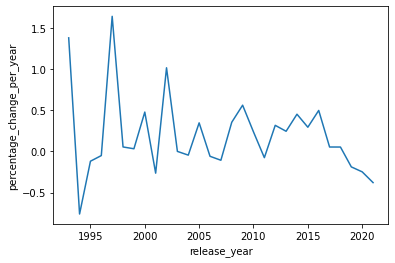

In [63]:
sns.lineplot(data = percentage_change_yearly, x = 'release_year', y = 'percentage_change_per_year')
plt.show()

### Comparison of tv shows vs. movies.

In [29]:
df4.head(2)

,title,listed_in,country,type,director,cast,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Documentaries,United States,Movie,Kirsten Johnson,NaN,2021-09-25,2020,PG-13,90 min
1,Blood & Water,International TV Shows,South Africa,TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2 Seasons


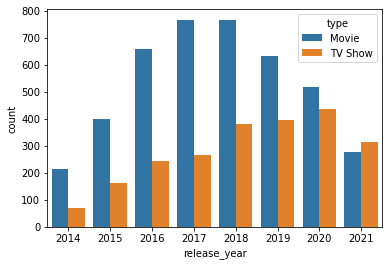

In [30]:
df5 = df.sort_values(by = 'release_year', ascending = False)

sns.countplot(data = df5.head(6500), x = 'release_year', hue = 'type')
plt.show()

### What is the best time to launch a TV show?

In [31]:
df4.head()

,title,listed_in,country,type,director,cast,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Documentaries,United States,Movie,Kirsten Johnson,NaN,2021-09-25,2020,PG-13,90 min
1,Blood & Water,International TV Shows,South Africa,TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2 Seasons
2,Blood & Water,TV Dramas,South Africa,TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2 Seasons
3,Blood & Water,TV Mysteries,South Africa,TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2 Seasons
4,Ganglands,Crime TV Shows,nan,TV Show,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",2021-09-24,2021,TV-MA,1 Season


In [32]:
df6 = df4.sort_values(by = 'release_year', ascending = False)
month = df6['date_added'].dt.month_name()
month = month.value_counts()
month = month.reset_index()
month.head()

,index,date_added
0,January,3849
1,July,3552
2,December,3458
3,September,3418
4,August,3287


<AxesSubplot:xlabel='date_added', ylabel='index'>

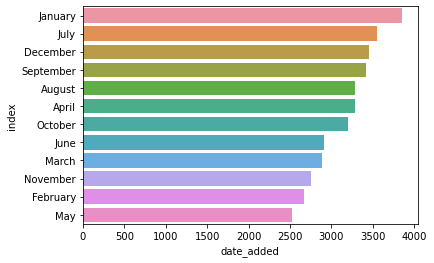

In [33]:
sns.barplot(data = month, y = 'index', x = 'date_added',)

### Cast, popular movie, famous director

In [34]:
df4

,title,listed_in,country,type,director,cast,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Documentaries,United States,Movie,Kirsten Johnson,NaN,2021-09-25,2020,PG-13,90 min
1,Blood & Water,International TV Shows,South Africa,TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2 Seasons
2,Blood & Water,TV Dramas,South Africa,TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2 Seasons
3,Blood & Water,TV Mysteries,South Africa,TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2 Seasons
4,Ganglands,Crime TV Shows,nan,TV Show,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",2021-09-24,2021,TV-MA,1 Season
...,...,...,...,...,...,...,...,...,...,...
37785,Zoom,Children & Family Movies,United States,Movie,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",2020-01-11,2006,PG,88 min
37786,Zoom,Comedies,United States,Movie,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",2020-01-11,2006,PG,88 min
37787,Zubaan,Dramas,India,Movie,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",2019-03-02,2015,TV-14,111 min
37788,Zubaan,International Movies,India,Movie,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",2019-03-02,2015,TV-14,111 min


In [35]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37790 entries, 0 to 37789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         37790 non-null  object        
 1   listed_in     37790 non-null  object        
 2   country       37790 non-null  object        
 3   type          37790 non-null  object        
 4   director      29265 non-null  object        
 5   cast          34571 non-null  object        
 6   date_added    37770 non-null  datetime64[ns]
 7   release_year  37790 non-null  int64         
 8   rating        37784 non-null  object        
 9   duration      37787 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 3.2+ MB


In [36]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<AxesSubplot:ylabel='type'>

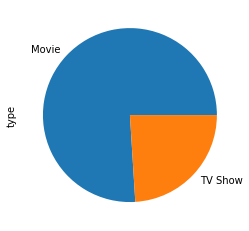

In [37]:
df4['type'].value_counts().plot(kind = 'pie')

In [38]:
x = df['cast'].apply(lambda x: str(x).split(', ')).to_list()
x = pd.DataFrame(x, index = df['title'])
x = x.stack()
x = pd.DataFrame(x)
x

0
title                                        
Dick Johnson Is Dead 0                    nan
Blood & Water        0             Ama Qamata
                     1            Khosi Ngema
                     2          Gail Mabalane
                     3         Thabang Molaba
...                                       ...
Zubaan               3       Manish Chaudhary
                     4           Meghna Malik
                     5          Malkeet Rauni
                     6         Anita Shabdish
                     7  Chittaranjan Tripathy

[64951 rows x 1 columns]

In [39]:
x.reset_index(inplace =True)

In [40]:
x = x[['title',0]]
x

,title,0
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


In [41]:
x = x.rename(columns = {0 : 'cast'})
x

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


In [42]:
# merging
data1 = pd.merge(df4,x, on = 'title', how = 'inner')
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298547 entries, 0 to 298546
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   title         298547 non-null  object        
 1   listed_in     298547 non-null  object        
 2   country       298547 non-null  object        
 3   type          298547 non-null  object        
 4   director      231352 non-null  object        
 5   cast_x        295328 non-null  object        
 6   date_added    298389 non-null  datetime64[ns]
 7   release_year  298547 non-null  int64         
 8   rating        298480 non-null  object        
 9   duration      298544 non-null  object        
 10  cast_y        298547 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 27.3+ MB


In [43]:
data1.drop(columns = 'cast_x', inplace=True)

In [44]:
data1.head()

,title,listed_in,country,type,director,date_added,release_year,rating,duration,cast_y
0,Dick Johnson Is Dead,Documentaries,United States,Movie,Kirsten Johnson,2021-09-25,2020,PG-13,90 min,nan
1,Blood & Water,International TV Shows,South Africa,TV Show,NaN,2021-09-24,2021,TV-MA,2 Seasons,Ama Qamata
2,Blood & Water,International TV Shows,South Africa,TV Show,NaN,2021-09-24,2021,TV-MA,2 Seasons,Khosi Ngema
3,Blood & Water,International TV Shows,South Africa,TV Show,NaN,2021-09-24,2021,TV-MA,2 Seasons,Gail Mabalane
4,Blood & Water,International TV Shows,South Africa,TV Show,NaN,2021-09-24,2021,TV-MA,2 Seasons,Thabang Molaba


In [45]:
data1['cast_y'].value_counts()

nan                     3219
David Attenborough       363
Matthias Schoenaerts     305
Paul Giamatti            281
Justin Fletcher          273
                        ... 
Ashleigh Hairston          1
Keith Machekanyanga        1
Donna Murphy               1
Ajanae Stephenson          1
Harrison Chad              1
Name: cast_y, Length: 36440, dtype: int64

In [46]:
pd.DataFrame(data1[data1['cast_y'] == 'David Attenborough'])

,title,listed_in,country,type,director,date_added,release_year,rating,duration,cast_y
26657,Breaking Boundaries: The Science Of Our Planet,Documentaries,United States,Movie,Jonathan Clay,2021-06-04,2021,TV-PG,74 min,David Attenborough
33725,Life in Color with David Attenborough,British TV Shows,Australia,TV Show,NaN,2021-04-22,2021,TV-PG,1 Season,David Attenborough
33726,Life in Color with David Attenborough,British TV Shows,United Kingdom,TV Show,NaN,2021-04-22,2021,TV-PG,1 Season,David Attenborough
33727,Life in Color with David Attenborough,Docuseries,Australia,TV Show,NaN,2021-04-22,2021,TV-PG,1 Season,David Attenborough
33728,Life in Color with David Attenborough,Docuseries,United Kingdom,TV Show,NaN,2021-04-22,2021,TV-PG,1 Season,David Attenborough
...,...,...,...,...,...,...,...,...,...,...
284182,The Making of Frozen Planet,Science & Nature TV,United States,TV Show,NaN,2016-01-28,2012,TV-PG,1 Season,David Attenborough
284183,The Making of Frozen Planet,Science & Nature TV,Spain,TV Show,NaN,2016-01-28,2012,TV-PG,1 Season,David Attenborough
284184,The Making of Frozen Planet,Science & Nature TV,Germany,TV Show,NaN,2016-01-28,2012,TV-PG,1 Season,David Attenborough
284185,The Making of Frozen Planet,Science & Nature TV,Greece,TV Show,NaN,2016-01-28,2012,TV-PG,1 Season,David Attenborough


In [47]:
pd.DataFrame(data1[data1['cast_y'] == 'David Attenborough']['duration']).value_counts()

duration
1 Season    284
47 min       36
52 min       36
84 min        4
53 min        1
63 min        1
74 min        1
dtype: int64

In [48]:
y = pd.DataFrame(data1[data1['cast_y'] == 'David Attenborough']['duration'])
y = y.reset_index(drop = True)
y['duration'].apply(lambda x : str(x).split(' '))

0        [74, min]
1      [1, Season]
2      [1, Season]
3      [1, Season]
4      [1, Season]
          ...     
358    [1, Season]
359    [1, Season]
360    [1, Season]
361    [1, Season]
362    [1, Season]
Name: duration, Length: 363, dtype: object

In [49]:
y['duration'].apply(lambda x : str(x).split(' ')[0])[1:].astype('int').count()

362

### Director split

In [50]:
x = df['director'].apply(lambda x: str(x).split(', ')).to_list()
x = pd.DataFrame(x, index = df['title'])
x = x.stack()
x = pd.DataFrame(x)
x

,,0
title,,
Dick Johnson Is Dead,0,Kirsten Johnson
Blood & Water,0,nan
Ganglands,0,Julien Leclercq
Jailbirds New Orleans,0,nan
Kota Factory,0,nan
...,...,...
Zodiac,0,David Fincher
Zombie Dumb,0,nan
Zombieland,0,Ruben Fleischer


In [51]:
x.reset_index(inplace =True)

In [52]:
x = x[['title',0]]
x

,title,0
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
...,...,...
9607,Zodiac,David Fincher
9608,Zombie Dumb,nan
9609,Zombieland,Ruben Fleischer
9610,Zoom,Peter Hewitt


In [53]:
x = x.rename(columns = {0 : 'director'})
x

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
...,...,...
9607,Zodiac,David Fincher
9608,Zombie Dumb,nan
9609,Zombieland,Ruben Fleischer
9610,Zoom,Peter Hewitt


In [54]:
# merging
data2 = pd.merge(data1,x, on = 'title', how = 'inner')
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327001 entries, 0 to 327000
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   title         327001 non-null  object        
 1   listed_in     327001 non-null  object        
 2   country       327001 non-null  object        
 3   type          327001 non-null  object        
 4   director_x    259806 non-null  object        
 5   date_added    326843 non-null  datetime64[ns]
 6   release_year  327001 non-null  int64         
 7   rating        326934 non-null  object        
 8   duration      326998 non-null  object        
 9   cast_y        327001 non-null  object        
 10  director_y    327001 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 29.9+ MB


In [55]:
data2['cast_y'].value_counts()

nan                  3790
Liam Neeson           669
Alfred Molina         662
John Krasinski        627
Frank Langella        570
                     ... 
Rachel Resheff          1
Joy Bryant              1
Lyndon Smith            1
Shyrley Rodriguez       1
James Black             1
Name: cast_y, Length: 36440, dtype: int64